<a href="https://colab.research.google.com/github/JVG4M35/Ideias/blob/main/C%C3%B3pia_de_teste.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Faça upload do seu arquivo .xls ou .xlsx:


Saving Salary_Data.xlsx to Salary_Data (4).xlsx
Arquivo carregado: Salary_Data (4).xlsx
Digite o número de linhas que deseja ler do arquivo: 12
Visualizando as 12 primeiras linhas do dataset:
    Age  Gender Education Level              Job Title  Years of Experience  \
0    32    Male      Bachelor's      Software Engineer                    5   
1    28  Female        Master's           Data Analyst                    3   
2    45    Male             PhD         Senior Manager                   15   
3    36  Female      Bachelor's        Sales Associate                    7   
4    52    Male        Master's               Director                   20   
5    29    Male      Bachelor's      Marketing Analyst                    2   
6    42  Female        Master's        Product Manager                   12   
7    31    Male      Bachelor's          Sales Manager                    4   
8    26  Female      Bachelor's  Marketing Coordinator                    1   
9    38    Male   

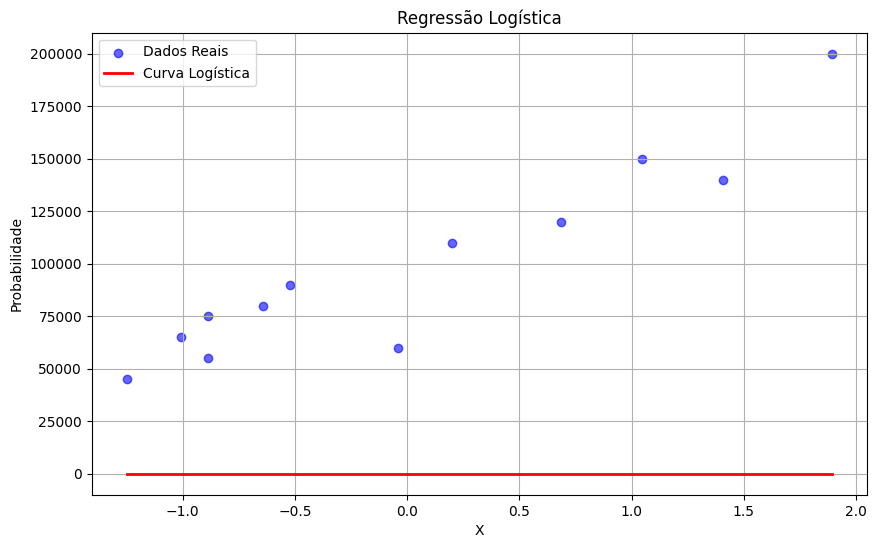

Iniciando treinamento (Regressão Linear)...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


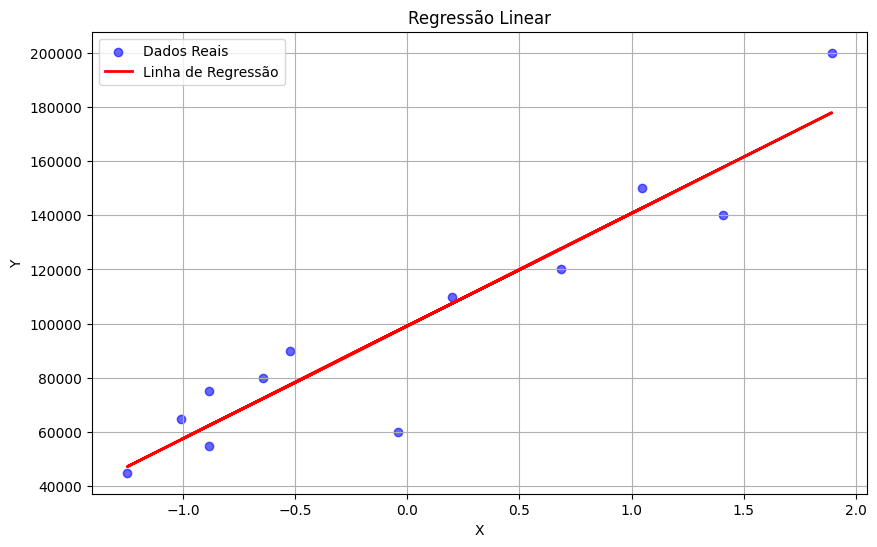

Iniciando treinamento (Rede Neural)...


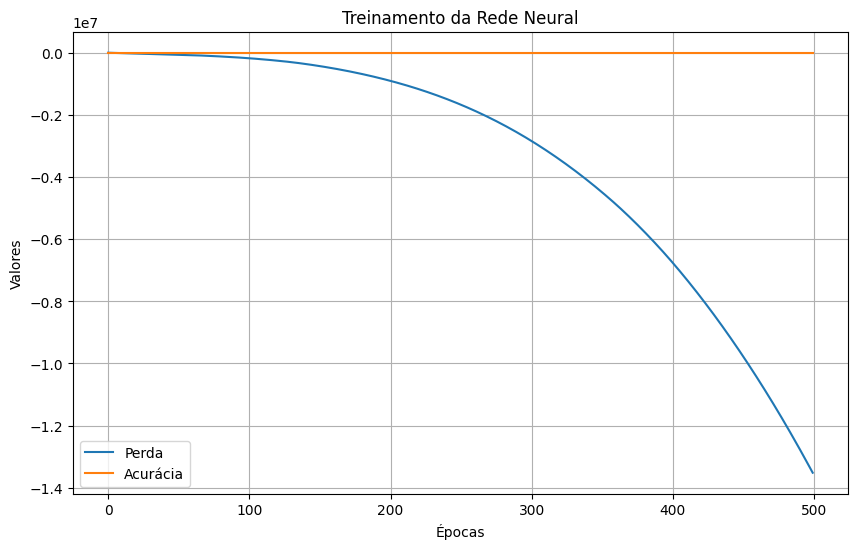

In [5]:
import os
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score
from google.colab import files

# Função para carregar dataset via upload no Google Colab
def carregar_dataset_via_upload():
    print("Faça upload do seu arquivo .xls ou .xlsx:")
    uploaded = files.upload()

    file_name = list(uploaded.keys())[0]
    print(f"Arquivo carregado: {file_name}")

    num_linhas = int(input("Digite o número de linhas que deseja ler do arquivo: "))
    dataset = pd.read_excel(file_name, nrows=num_linhas)

    print(f"Visualizando as {num_linhas} primeiras linhas do dataset:")
    print(dataset.head(num_linhas))

    print("\nColunas disponíveis no dataset:")
    print(dataset.columns.tolist())

    return dataset

# REGRESSÃO LOGÍSTICA ----------------------------------------------------------------------
a = tf.Variable(0.0, dtype=tf.float32)
b = tf.Variable(0.0, dtype=tf.float32)
learning_rate = 0.01
optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)

# Função sigmoid
def sigmoid(z):
    return 1 / (1 + tf.exp(-z))

# Função de perda para regressão logística
def calcular_perda_logistica(x_tensor, y_tensor):
    logits = a * x_tensor + b
    y_pred = sigmoid(logits)
    return -tf.reduce_mean(y_tensor * tf.math.log(y_pred + 1e-7) + (1 - y_tensor) * tf.math.log(1 - y_pred + 1e-7))

# Treinar modelo de regressão logística
def treinar_modelo_logistico(x_tensor, y_tensor, epochs, tol=1e-6):
    for epoch in range(epochs):
        with tf.GradientTape() as tape:
            perda = calcular_perda_logistica(x_tensor, y_tensor)

        gradientes = tape.gradient(perda, [a, b])
        optimizer.apply_gradients(zip(gradientes, [a, b]))

# Avaliação do modelo de regressão logística
def avaliar_modelo_logistica(x, y):
    logits = a * x + b
    y_pred = tf.cast(sigmoid(logits) > 0.5, tf.int32)

    n_classes = len(tf.unique(y).y)
    average_type = 'binary' if n_classes == 2 else 'weighted'

    acc = accuracy_score(y, y_pred.numpy())
    f1 = f1_score(y, y_pred.numpy(), average=average_type)

    return acc, f1

# Visualizar resultados da regressão logística
def plotar_resultados_logistica(x, y):
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, label="Dados Reais", color="blue", alpha=0.6)
    x_plot = tf.sort(x)
    y_plot = [sigmoid(a * xi + b).numpy() for xi in x_plot]
    plt.plot(x_plot, y_plot, color="red", label="Curva Logística", linewidth=2)
    plt.title("Regressão Logística")
    plt.xlabel("X")
    plt.ylabel("Probabilidade")
    plt.legend()
    plt.grid()
    plt.show()

# REGRESSÃO LINEAR ----------------------------------------------------------------------
def treinar_regressao_linear(x, y):
    linear_model = tf.keras.Sequential([tf.keras.layers.Dense(1, input_shape=[1])])
    linear_model.compile(optimizer='sgd', loss='mse')
    history = linear_model.fit(x, y, epochs=500, verbose=0)
    return linear_model, history

def plotar_resultados_regressao_linear(x, y, modelo):
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, label="Dados Reais", color="blue", alpha=0.6)
    plt.plot(x, modelo.predict(x), color="red", label="Linha de Regressão", linewidth=2)
    plt.title("Regressão Linear")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.legend()
    plt.grid()
    plt.show()

# REDE NEURAL ----------------------------------------------------------------------
def treinar_rede_neural(x, y):
    neural_model = tf.keras.Sequential([
        tf.keras.layers.Dense(16, activation='relu', input_shape=[1]),
        tf.keras.layers.Dense(16, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    neural_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    history = neural_model.fit(x, y, epochs=500, verbose=0)
    return neural_model, history

def plotar_resultados_rede_neural(history):
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label="Perda")
    plt.plot(history.history['accuracy'], label="Acurácia")
    plt.title("Treinamento da Rede Neural")
    plt.xlabel("Épocas")
    plt.ylabel("Valores")
    plt.legend()
    plt.grid()
    plt.show()

# EXECUTAR TODO O PROCESSO ----------------------------------------------------------------------
def executar_todos_modelos():
    try:
        # Carregar o dataset
        dataset = carregar_dataset_via_upload()

        # Seleção das colunas
        coluna_x = input("Digite o nome da coluna X (variável independente): ").strip()
        coluna_y = input("Digite o nome da coluna Y (variável dependente): ").strip()

        if coluna_x not in dataset.columns or coluna_y not in dataset.columns:
            raise ValueError(f"Colunas '{coluna_x}' ou '{coluna_y}' não encontradas no arquivo.")

        x = dataset[coluna_x].values.astype("float32")
        y = dataset[coluna_y].values.astype("float32")

        x_normalizado = (x - tf.reduce_mean(x)) / tf.math.reduce_std(x)
        x_tensor = tf.constant(x_normalizado, dtype=tf.float32)
        y_tensor = tf.constant(y, dtype=tf.float32)

        # Regressão Logística
        print("Iniciando treinamento (Regressão Logística)...")
        treinar_modelo_logistico(x_tensor, y_tensor, epochs=500)
        acc_logistica, f1_logistica = avaliar_modelo_logistica(x_tensor, y_tensor)
        print(f"Acurácia (Regressão Logística): {acc_logistica:.4f}, F1-Score: {f1_logistica:.4f}")
        plotar_resultados_logistica(x_tensor, y_tensor)

        # Regressão Linear
        print("Iniciando treinamento (Regressão Linear)...")
        modelo_linear, history_linear = treinar_regressao_linear(x_tensor, y_tensor)
        plotar_resultados_regressao_linear(x_tensor, y_tensor, modelo_linear)

        # Rede Neural
        print("Iniciando treinamento (Rede Neural)...")
        modelo_neural, history_neural = treinar_rede_neural(x_tensor, y_tensor)
        plotar_resultados_rede_neural(history_neural)

    except Exception as e:
        print(f"Erro: {e}")

# Executar a função principal
executar_todos_modelos()
